# One dimensional interpolation and fitting

Say we have some data that in binned in to pixels. We may want to find out what is the value of a different set of pixels or at a particular point that is not on our "grid" of pixels.

in 1D this is very easy with scipy using the 1D interpolation function.

an example is shown below:

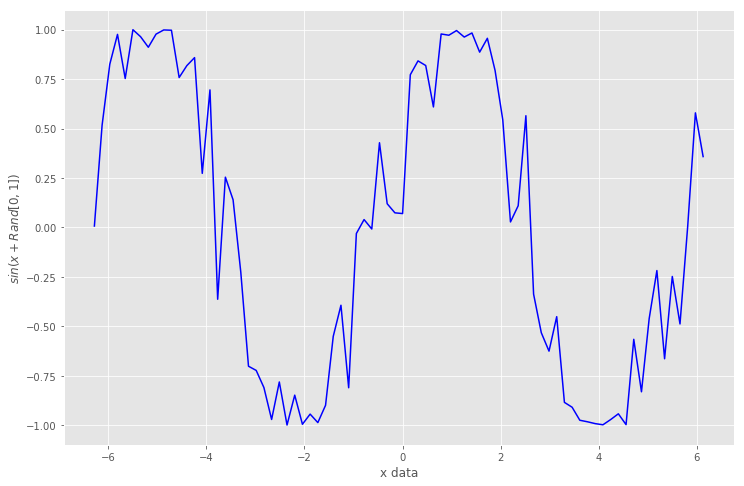

In [3]:
# notebook
%matplotlib inline
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# set matplotlib style
plt.style.use('ggplot')

# set up some fake x data, x is binned into pixels of pi/20.
x = np.arange(-2*np.pi, 2*np.pi, np.pi/20.)
# set up some fake y data sin + random
y = np.sin(x + np.random.uniform(0, 1, size=len(x)))

# set up plot
fig, frame = plt.subplots(ncols=1, nrows=1)
fig.set_size_inches(12, 8)

# plot the raw data
frame.plot(x, y, label='data', color='b')
# format axis
frame.set(xlabel='x data', ylabel=r'$sin(x + Rand[0, 1])$')


Now we can create an interpolation instance using scipy:

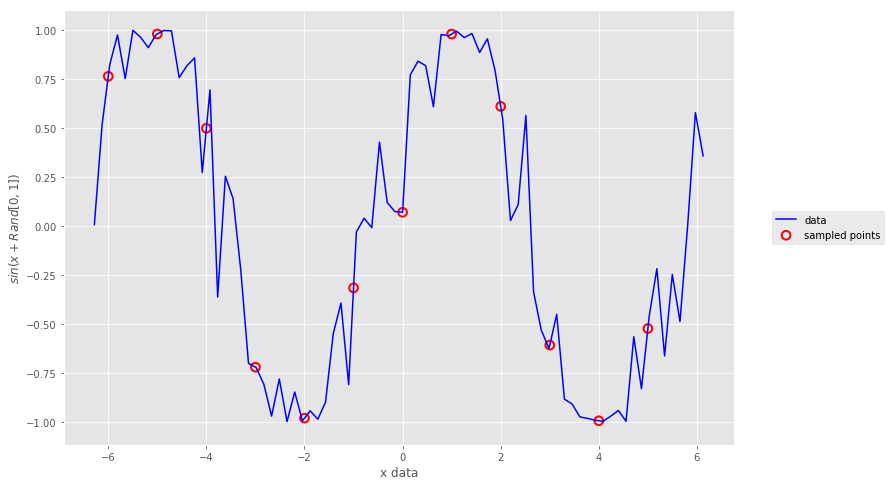

In [8]:
# inputs are x and y data, output is a instance object that provides the interpolation
interp_function = interp1d(x, y)

# now we can sample the function at some points:
xnew = np.arange(-6, 6, 1)
ynew = interp_function(xnew)

# set up plot
fig, frame = plt.subplots(ncols=1, nrows=1)
fig.set_size_inches(12, 8)

# and plot the raw data with the new points overplotted
frame.plot(x, y, label='data', color='b')
frame.scatter(xnew, ynew, label='sampled points', marker='o', edgecolor='r', 
              facecolor='None', s=75, linewidth=2)
# format axis
frame.set(xlabel='x data', ylabel=r'$sin(x + Rand[0, 1])$')
# add legend (force outside bounds by bbox_to_anchor)
frame.legend(loc=6, bbox_to_anchor=(1.05, 0.5))

Note this is **NOT** a fit to the data and each point is taken as being the true location of the underlying distribution. If one wanted to fit this data one would need to use a fitting algorithm such as scipy curve_fit:

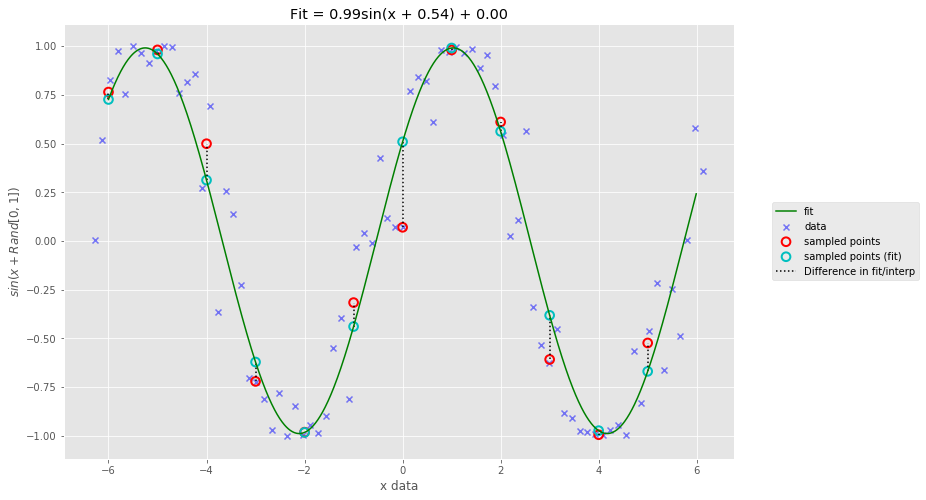

In [10]:
# import
from scipy.optimize import curve_fit

# model for the data (sin curve)
def model(x, a, b, c):
    return a * np.sin(x + b) + c

# fit the data
popt, pcov = curve_fit(model, x, y)
# high resolution fit of the data
fitx = np.arange(-6, 6, 0.01)
fity = model(fitx, *popt)
# sampled fit of the data
samplefity = model(xnew, *popt)

# set up plot
fig, frame = plt.subplots(ncols=1, nrows=1)
fig.set_size_inches(12, 8)

# and plot the raw data with the new points overplotted, and the new 
#    fit + sampled points
frame.scatter(x, y, color='b', label='data', marker='x', alpha=0.5)
frame.scatter(xnew, ynew, label='sampled points', marker='o', edgecolor='r', 
              facecolor='None', s=75, linewidth=2)
frame.plot(fitx, fity, color='g', label='fit')
frame.scatter(xnew, samplefity, edgecolor='c', label='sampled points (fit)',
              facecolor='None', s=75, linewidth=2)
# show lines between sampled points and sampled fitted points
frame.vlines(xnew, np.min([ynew, samplefity], axis=0), np.max([ynew, samplefity], axis=0),
             label='Difference in fit/interp', linestyle=':')
# format axis
frame.set(xlabel='x data', ylabel=r'$sin(x + Rand[0, 1])$',
          title='Fit = {0:.2f}sin(x + {1:.2f}) + {2:.2f}'.format(*popt))
# add legend (force outside bounds by bbox_to_anchor)
frame.legend(loc=6, bbox_to_anchor=(1.05, 0.5))


Note the differences between the fitted points and the interpolated points!

Ones use of interpolate and curve_fit depends on the data.